In [3]:
import numpy as np
import scipy.io
import itertools # for generting all possible n-grams
import sklearn.metrics

#for visualization
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

n_g=2 # n-gram size
data = scipy.io.loadmat('languages_data.mat')
alphabet=(data['alphabet'])
alphabet=str(alphabet[0]) # turn into string
N_GRAMS=[p for p in itertools.product(alphabet, repeat=n_g)] # get all possible n-grams

# get data from the file
chop_size=int(data['chop_size'])
exm_size=int(data['exm_size'])
langLabels=(data['langLabels'])
testing=(data['testing'])
training=(data['training'])

#Download all languages
import download
import threading

def maybe_download_and_extract(language_code="sv"):
    url = "http://www.statmt.org/europarl/v7/"

    # Create the full URL for the file with this data-set.
    data_url = url + language_code + "-en.tgz"
    data_dir = "data/europarl/" + language_code + "/"

    download.download(url=data_url, path=data_dir, kind="tar.gz", progressbar=False, replace=True)


def runInParallel():
  # We download the files in parallel to speed up and reduce the time needed.
  lang_codes = ["bg", "cs", "da", "de", "el", "es", "et", "fi", "fr", "hu", "it", "lv", "nl", "pl", "pt", "ro", "sk", "sl", "sv"]

  proc = []
  for code in lang_codes:
    thread = threading.Thread(target=maybe_download_and_extract, args=(code,))
    thread.start()
    proc.append(thread)
  for thread in proc:
    thread.join()

  print("done")

runInParallel()

C:\Users\wiklu\AppData\Local\Temp\ipykernel_27740\3634378969.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chop_size=int(data['chop_size'])
C:\Users\wiklu\AppData\Local\Temp\ipykernel_27740\3634378969.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  exm_size=int(data['exm_size'])


Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...
Creating data folder...



















Extracting tar.gz file...
Successfully downloaded / unzipped to data/europarl/ro/
Extracting tar.gz file...
Successfully downloaded / unzipped to data/europarl/bg/
Extracting tar.gz file...
Extracting tar.gz file...
Successfully downloaded / unzipped to data/europarl/sl/
Successfully downloaded / unzipped to data/europarl/lv/
Extracting tar.gz file...
Successfully downloaded / unzipped to data/europarl/et/
Extracting tar.gz file...
Extracting tar.gz file...
Extracting tar.gz file...
Extracting tar.gz file...
Successfull

In [4]:
# Print an example of a text in the training data
ind=3
print(langLabels[0][ind])
print(training[0][ind])
print (chop_size)

['nld']
[' juist om die ruimte te scheppen op deze site vindt u meer informatie over onze producten in zeeland kan de formatie van naaldwijk direct bovenop de formatie van maassluis liggen op zoek naar een unieke beleving sinds heeft hij een breed scala aan kennis en ervaring opgebouwd in de administratieve informatievoorziening de centrumlinkse kandidaat kreeg iets meer dan procent van de stemmen perfect internetworking solutions stelt de software van realaudio en realvideo gratis beschikbaar we kunnen nu opnieuw uit respect voor de kiezer geen steun verlenen aan heijenk over andere punten die de advocaat van louwes had aangedragen aan de hoge raad adviseert de advocaatgeneraal negatief die zijn in zijn ogen niet voldoende om de zaak ter herzien met de half miljard aan extra middelen moeten docenten worden bijgeschoold en ondersteund ook hierbij is de afsluiting zeer belangrijk om geen reinfectie te krijgen bij sylkamode vindt u een grote kast gevuld met allerlei kralen pijpjeskralen 

# Pre-processing 1.1

In [32]:
import os
from unidecode import unidecode

def preprocess_text_file(input_file, output_file, removal, max_rows=1000):
    try:
        # Read the content of the input file, limited to the first 1000 rows
        with open(input_file, 'r', encoding='utf-8') as file:
            content = file.read(max_rows)

        # Remove characters in the 'removal' array
        cleaned_content = ''.join(char for char in content if char not in removal)

        # Use unidecode to convert Unicode to ASCII
        cleaned_content = unidecode(cleaned_content)

        # Write the modified content back to the output file
        with open(output_file, 'w', encoding='utf-8') as file:
            file.write(cleaned_content)

        print(f"Text file '{input_file}' preprocessed and saved to '{output_file}'.")
    
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")

def preprocess_files_in_directory(directory, removal, max_rows=1000):
    for subdir, _, files in os.walk(directory):
        for file in files:
            input_file_path = os.path.join(subdir, file)
            output_file_name = f"pre-{os.path.basename(subdir)}_{file}"
            output_file_path = os.path.join(subdir, output_file_name)
            preprocess_text_file(input_file_path, output_file_path, removal, max_rows)
            print("Pre-processed", str(input_file_path))

# Example usage:
europarl_directory = r'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl'
removal_characters = set("0123456789!@#$%^&*()_-+=<>?,./:;{}[]|`~\"'\\")  # Add other characters you want to remove
all_language_dirs  = ['bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hu', 'it', 'lv', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']

preprocess_files_in_directory(europarl_directory, removal_characters)


Text file 'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\bg\europarl-v7.bg-en.bg' preprocessed and saved to 'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\bg\pre-bg_europarl-v7.bg-en.bg'.
Pre-processed C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\bg\europarl-v7.bg-en.bg
Text file 'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\bg\europarl-v7.bg-en.en' preprocessed and saved to 'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\bg\pre-bg_europarl-v7.bg-en.en'.
Pre-processed C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\bg\europarl-v7.bg-en.en
Text file 'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl\cs\europarl-v7.cs-en.cs' preprocessed and saved to 'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\dat

# Remove preprocessed files


In [31]:
import os

def remove_preprocessed_files(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.startswith("pre-"):
                file_path = os.path.join(subdir, file)
                os.remove(file_path)
                print(f"File '{file}' removed.")

# Example usage:
europarl_directory = r'C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl'
remove_preprocessed_files(europarl_directory)

File 'pre-bg_europarl-v7.bg-en.bg' removed.
File 'pre-bg_europarl-v7.bg-en.en' removed.
File 'pre-bg_pre-europarl-v7.bg-en.bg' removed.
File 'pre-bg_pre-europarl-v7.bg-en.en' removed.
File 'pre-europarl-v7.bg-en.bg' removed.
File 'pre-europarl-v7.bg-en.en' removed.
File 'pre-cs_europarl-v7.cs-en.cs' removed.
File 'pre-cs_europarl-v7.cs-en.en' removed.
File 'pre-da_europarl-v7.da-en.da' removed.
File 'pre-da_europarl-v7.da-en.en' removed.
File 'pre-de_europarl-v7.de-en.de' removed.
File 'pre-de_europarl-v7.de-en.en' removed.
File 'pre-el_europarl-v7.el-en.el' removed.
File 'pre-el_europarl-v7.el-en.en' removed.
File 'pre-es_europarl-v7.es-en.en' removed.
File 'pre-es_europarl-v7.es-en.es' removed.
File 'pre-et_europarl-v7.et-en.en' removed.
File 'pre-et_europarl-v7.et-en.et' removed.
File 'pre-fi_europarl-v7.fi-en.en' removed.
File 'pre-fi_europarl-v7.fi-en.fi' removed.
File 'pre-fr_europarl-v7.fr-en.en' removed.
File 'pre-fr_europarl-v7.fr-en.fr' removed.
File 'pre-hu_europarl-v7.hu-en

# 2.0

In [52]:
import numpy as np
encodingDict = {}

for i in letters:
    encodingDict[i] = np.random.choice([-1, 1], size=dimensions)

print(encodingDict)

{'a': array([ 1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
        1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1]), 'b': array([ 1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1]), 'c': array([ 1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1

In [44]:
import os
import unidecode

testS = []
s_dict = {}
testingLabels = []
all_language_dirs  = ['bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hu', 'it', 'lv', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']

letters = "abcdefghijklmnopqrstuvwxyz "
base_path = r"C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl"

for language in all_language_dirs:
    folder_path = os.path.join(base_path, language)
    for file_name in os.listdir(folder_path):
        if file_name.startswith("pre-"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, mode="r", encoding="utf8") as data:
                i = 0
                for line in data:
                    dt = unidecode.unidecode(line).lower()
                    for x in dt:
                        if x not in letters:
                            dt = dt.replace(x, '')
                    ngrams = [dt[i:i + 2] for i in range(len(dt) - 1)]
                    for ngram in ngrams:
                        if s_dict.get(ngram) is None:
                            s_dict[ngram] = 1
                        else:
                            s_dict[ngram] += 1
                testS.append(s_dict)
                testingLabels.append(language)
                s_dict = {}
                i += 1
                if i >= 10:
                    break

print(testS)
print(testingLabels)

[{'ss': 2, 'st': 8, 'ta': 8, 'av': 4, 'v ': 2, ' n': 18, 'na': 20, 'a ': 35, ' p': 23, 'pa': 5, 'ar': 6, 'rl': 5, 'la': 13, 'am': 6, 'me': 11, 'en': 17, 'nt': 9, ' v': 15, 'vz': 13, 'zh': 13, 'h ': 13, 'pr': 21, 'ro': 22, 'ot': 20, 'to': 20, 'ok': 17, 'ko': 14, 'ol': 15, 'li': 11, 'od': 1, 'do': 2, 'ob': 1, 'br': 3, 'ri': 7, 'ia': 8, 'va': 7, 'an': 17, 'ne': 11, 'e ': 17, ' o': 3, 't ': 4, 're': 7, 'ed': 17, 'di': 5, 'is': 6, 'sh': 4, 'hn': 1, 'no': 4, 'o ': 3, ' z': 9, 'za': 11, 'as': 11, 'se': 8, 'da': 9, 'ni': 8, 'ie': 10, 'it': 4, 'te': 6, 'ov': 3, 've': 6, 'er': 5, 'rk': 1, 'ka': 4, 'pl': 1, 'ln': 1, 'om': 3, 'mo': 1, 'os': 2, 'hc': 3, 'ch': 5, 'hi': 1, 'ii': 8, 'at': 5, 'vn': 2, 'si': 9, ' d': 4, 'ku': 1, 'um': 6, 'ti': 3, 'i ': 12, 'vp': 1, ' s': 10, 's ': 2, ' i': 2, 'sk': 3, ' u': 13, 'us': 1, 'n ': 6, 'tg': 1, 'go': 1, 'vo': 1, 'or': 6, 'r ': 7, 'pi': 1, 'sm': 1, 'de': 6, 'ek': 2, 'kl': 1, 'ra': 7, 'ts': 3, 'pe': 3, 'et': 4, ' t': 1, 'ks': 1, 'sp': 1, 'po': 3, 'az': 1, 'zu': 

In [61]:
import os
import unidecode

valid_characters = "abcdefghijklmnopqrstuvwxyz "
ngram_frequencies = {}
vector_dimensions = 100
ngram_length = 3
alphabet_size = 27
labels = []
training_data = []
base_path = r"C:\Users\wiklu\OneDrive\Skrivbord\LTU\LTU\D7041E\d7041e_labs_JMEW\lab3\data\europarl"
all_language_dirs = ['bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hu', 'it', 'lv', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']

for language in all_language_dirs:
    folder_path = os.path.join(base_path, language)
    for file_name in os.listdir(folder_path):
        if file_name.startswith("pre-"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, mode="r", encoding="utf8") as file:
                name_parts = file_name.split("_", 1)
                labels.append(name_parts[0])

                for line in file:
                    clean_line = unidecode.unidecode(line).lower()

                    for char in clean_line:
                        if char not in valid_characters:
                            clean_line = clean_line.replace(char, '')

                    ngrams = [clean_line[i:i + ngram_length] for i in range(len(clean_line) - 1)]

                    for ngram in ngrams:
                        if ngram not in ngram_frequencies:
                            ngram_frequencies[ngram] = 1
                        else:
                            ngram_frequencies[ngram] += 1

                training_data.append(ngram_frequencies)
                ngram_frequencies = {}


In [62]:
import numpy as np
def transform_ngram_data(listS):
    listH = []
    for s in listS:
        h = np.zeros(dimensions)       
        for ngram in s.keys():
            n_i = np.random.choice([1], size = dimensions)
            s_i = s[ngram]
            j = 1
            for x in ngram:
                n_i = np.multiply(n_i, np.roll(encodingDict[x], j))
                j +=1
            h += s_i * n_i
        h = h/np.linalg.norm(h)
        listH.append(h)
    return(listH)

training_H = transform_ngram_data(training_data) 
testing_H = transform_ngram_data(testS)
print(training_H)
print(testing_H)


[array([ 0.02926431,  0.05082749,  0.15556292,  0.11243657, -0.04158613,
       -0.05082749, -0.06314931, -0.19252837, -0.13399975, -0.0970343 ,
        0.06006885,  0.07239067, -0.13399975, -0.0169425 , -0.19868928,
       -0.05082749, -0.10319521,  0.0169425 ,  0.11859748, -0.22641337,
        0.00770113,  0.18328701,  0.15556292,  0.09087339, -0.10935612,
        0.09395385,  0.11243657,  0.08163203, -0.24181564,  0.04774704,
       -0.10935612, -0.0169425 ,  0.00154023, -0.04158613, -0.0169425 ,
        0.06622976,  0.01386204, -0.28494199,  0.02926431, -0.12475839,
       -0.16172383,  0.16172383,  0.18328701, -0.15248247,  0.01386204,
       -0.0970343 , -0.02926431,  0.01078159,  0.12167793, -0.02002295,
       -0.10319521, -0.07547112, -0.00770113, -0.07547112, -0.0970343 ,
        0.17404565,  0.02002295,  0.01386204,  0.02618386, -0.04466658,
       -0.02618386, -0.02618386,  0.20793064, -0.04158613, -0.05082749,
        0.03234477, -0.00462068, -0.00154023, -0.00770113, -0.1

In [66]:
predLabels = []

for test in testing_H:
    cos = []
    
    for training in training_H:
        cosine = np.dot(test, training) / (np.linalg.norm(test) * np.linalg.norm(training))
        cos.append(cosine)
    if cos:
        maxIndex = np.argmax(cos)
        predLabels.append(labels[maxIndex])
    else:
        # Handle the case where cos is empty (e.g., testing_H or training_H is empty)
        predLabels.append(None)

print(predLabels)


[0.08793876226295887, -0.003804236990731852, -0.06684981431631173, -0.019824885847367236, -0.0865196094223975, 0.025611932790305162, -0.03666109293525103, 0.025611932790305162, -0.0424807194164422, 0.025611932790305162, 0.025611932790305162, -0.1895963521506347, -0.019824885847367236, 0.08785392190906897, 0.025611932790305162, -0.09894294252435164, 0.025611932790305162, -0.11121507188490967, -0.019824885847367236, -0.016255704379654602, 0.025611932790305162, -0.1464967331975509, -0.019824885847367236, -0.0400411169010323, 0.025611932790305162, 0.025222947500575372, -0.019824885847367236, 0.021697027553678902, 0.025611932790305162, -0.17795490598669056, -0.003804236990731852, 0.07395578196826037, -0.019824885847367236, -0.1269777185268614, -0.019824885847367236, -0.2635451034160817, 0.025611932790305162, -0.09586855360764085]
[0.08066044182720512, 0.15922941195141604, 0.0490452333921562, 0.1963450280015594, 0.13121831626316002, 0.13000715951481007, 0.15843236779194533, 0.130007159514810

In [ ]:
import numpy as np

def encode_tri_gram(tri_gram):
    # Encode each element of the tri-gram to +1 or -1 randomly
    encoded_tri_gram = [1 if np.random.rand() > 0.5 else -1 for _ in tri_gram]
    return encoded_tri_gram

def map_to_hd_vectors(encoded_tri_gram, d1, d2):
    # Map the encoded tri-gram to HD vectors
    hd_vector_d1 = np.zeros(d1)
    hd_vector_d2 = np.zeros(d2)

    # Randomly select subsets of coordinates
    selected_coordinates_d1 = np.random.choice(d1, size=len(encoded_tri_gram), replace=False)
    selected_coordinates_d2 = np.random.choice(d2, size=len(encoded_tri_gram), replace=False)

    # Assign values to the selected coordinates
    hd_vector_d1[selected_coordinates_d1] = encoded_tri_gram
    hd_vector_d2[selected_coordinates_d2] = encoded_tri_gram

    return hd_vector_d1, hd_vector_d2

def process_text_file(file_path, d1, d2):
    with open(file_path, 'r') as file:
        text = file.read()

    tri_grams = [text[i:i+3] for i in range(len(text)-2)]
    
    hd_vectors_d1 = []
    hd_vectors_d2 = []

    for tri_gram in tri_grams:
        encoded_tri_gram = encode_tri_gram(tri_gram)
        hd_vector_d1, hd_vector_d2 = map_to_hd_vectors(encoded_tri_gram, d1, d2)
        hd_vectors_d1.append(hd_vector_d1)
        hd_vectors_d2.append(hd_vector_d2)

    return np.array(hd_vectors_d1), np.array(hd_vectors_d2)

# Example usage
file_path = 'your_text_file.txt'  # Replace with the path to your text file
d1 = 100
d2 = 1000

hd_vectors_d1, hd_vectors_d2 = process_text_file(file_path, d1, d2)

print("HD Vectors (d1):", hd_vectors_d1)
print("HD Vectors (d2):", hd_vectors_d2)


In [140]:
# collect n-gram statitics for all training data 
TR_grams=np.zeros((len(N_GRAMS),langLabels.size), dtype='float') # initialize n-gram statistics for the  training

for i in range(langLabels.size):
    print(langLabels[0][i])

    buf_chop=training[0][i] #pick the current portion
    buf_chop=np.array2string(buf_chop) # get to string    
    buf_chop=(buf_chop[3:len(buf_chop)-2]) # get rid of artefacts like []
    
    for jj in range(len(buf_chop)-(n_g-1)):        
        ngc=buf_chop [jj:(jj+(n_g))] #pick current n-gram
        ngc1= tuple(ngc)
        ind_ngc=N_GRAMS.index(ngc1) # find index in  N_GRAMS
        TR_grams[ind_ngc,i]+=1 #increment the corresponding statisticss

    TR_grams[:,i]=TR_grams[:,i]/np.linalg.norm(TR_grams[:,i]) # normalize

print(TR_grams[:,0])    

['bul']
['ces']
['dan']
['nld']
['deu']
['eng']
['est']
['fin']
['fra']
['ell']
['hun']
['ita']
['lav']
['lit']
['pol']
['por']
['ron']
['slk']
['slv']
['spa']
['swe']
[0.         0.04877643 0.02926586 0.01951057 0.07804228 0.02926586
 0.         0.02926586 0.         0.01951057 0.         0.068287
 0.03902114 0.068287   0.17559513 0.07804228 0.17559513 0.
 0.02926586 0.17559513 0.05853171 0.00975529 0.14632928 0.
 0.         0.         0.05853171 0.44874312 0.         0.
 0.00975529 0.01951057 0.         0.         0.         0.
 0.00975529 0.         0.13657399 0.05853171 0.00975529 0.02926586
 0.         0.00975529 0.         0.01951057 0.05853171 0.20486099
 0.         0.05853171 0.         0.         0.         0.01951057
 0.         0.00975529 0.         0.         0.00975529 0.00975529
 0.         0.         0.         0.01951057 0.         0.
 0.00975529 0.         0.00975529 0.00975529 0.         0.
 0.         0.         0.         0.00975529 0.         0.
 0.         0.     

In [134]:
# collect n-gram statitics for all testing data 


GT = [None] * langLabels.size * exm_size   #ground truth  
PR = [None] * langLabels.size * exm_size   #predicton

for i in range(langLabels.size):    
    for j in range(exm_size): 
        TS_gram=np.zeros((len(N_GRAMS),1), dtype='float') # initialize n-gram statistics for the  test example
        buf_chop=testing[j][i] #pick the current portion
        buf_chop=np.array2string(buf_chop) # get to string    
        buf_chop=buf_chop[3:len(buf_chop)-2] # get rid of artefacts like []
        
        for jj in range(len(buf_chop)-(n_g-1)): 
            ngc=buf_chop [jj:(jj+(n_g))] #pick current n-gram
            ngc= tuple(ngc)
            ind_ngc=N_GRAMS.index(ngc) # find index in  N_GRAMS            
            TS_gram[ind_ngc,0]+=1 #increment the corresponding statisticss
            
        DP=np.dot(TS_gram.transpose(),TR_grams)
        ind=np.argmax(DP) #  index of predictd language
        PR[ i*exm_size +j ]=np.array2string(langLabels[0][ind])
        GT[ i*exm_size +j ]=np.array2string(langLabels[0][i]) # add ground truth

In [66]:
# accuracy 
acc=0.0
for i in range(len(GT)):
   acc+=(PR[i]==GT[i])

acc=acc/len(GT) 
print(acc)

0.8761904761904762


In [130]:
langLabels[0][1][0].tolist()
Labels_arr=np.empty(21).astype(str)
for i in range(21):
    Labels_arr[i]=langLabels[0][i][0]
    
Labels_arr


array(['bul', 'ces', 'dan', 'nld', 'deu', 'eng', 'est', 'fin', 'fra',
       'ell', 'hun', 'ita', 'lav', 'lit', 'pol', 'por', 'ron', 'slk',
       'slv', 'spa', 'swe'], dtype='<U32')

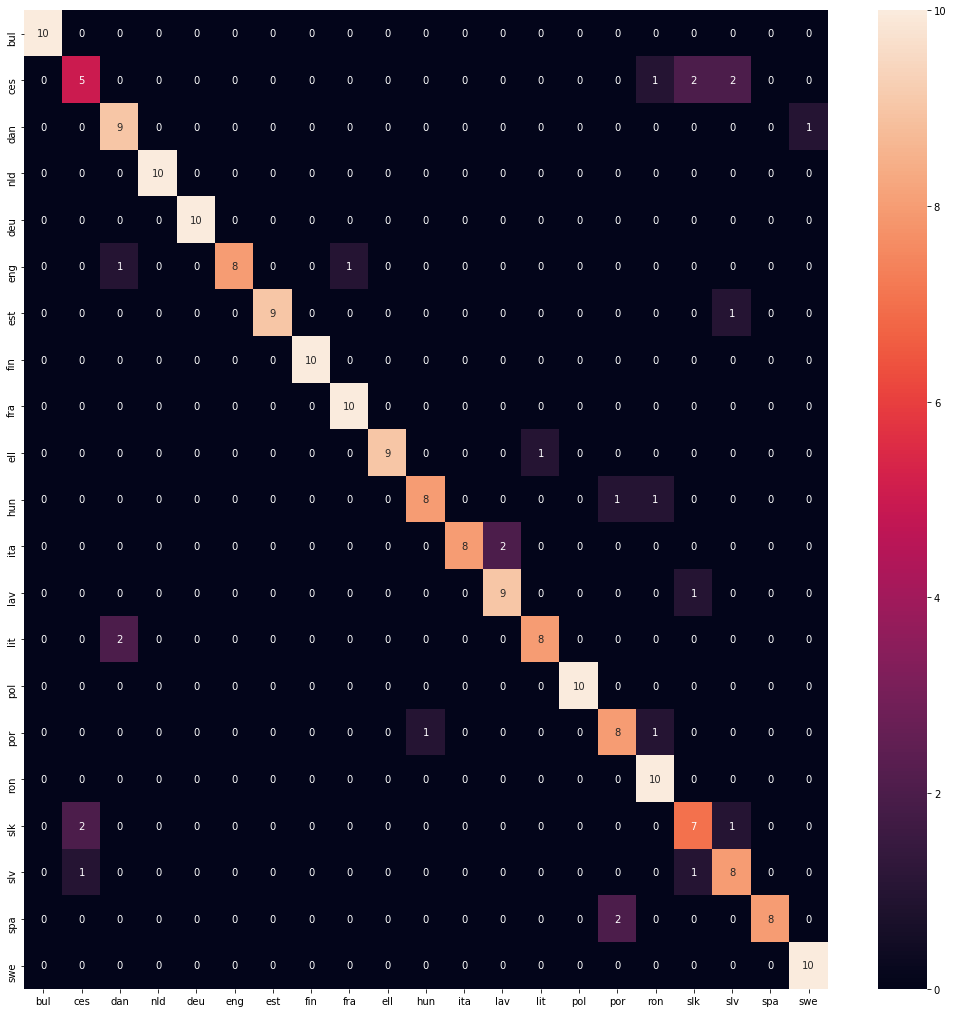

In [133]:
conf_mat= sklearn.metrics.confusion_matrix(GT, PR, labels=None, sample_weight=None)

#plot confusion matrix
%matplotlib inline
df_cm = pd.DataFrame(conf_mat, index = [i for i in Labels_arr], columns = [j for j in Labels_arr])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)